# <strong>Tarea 1</strong>

### Noemí Lizbeth Moreno López
##### 08/11/19

## <strong> Tutorial de Python </strong>

2.- Buscar otro tutorial de Python, hacer ejercicios usando <strong>numpy</strong> y <strong>funciones<strong>. Hacer un notebook. Resaltar las diferencias entre tipos de variables, listas y arreglos, etc.

### <strong>Variables</strong>

Es importante el concepto de <strong>variable,</strong> dado que en lenguajes de programación es común su uso. 

El conjunto de objetos principales de Python incluye los siguientes tipos: <strong>enteros, flotantes, caracteres, etc.</strong> Las variables en Python soportan operaciones dadas al tipo de variable, e.g., operaciones matemáticas sobre todas aquellas variables que son números.


### <strong>Listas</strong>

Una <strong>lista</strong> es la secuencia más general proporcionada por el lenguaje. Las <strong>listas</strong> son colecciones ordenadas posicionalmente de objetos tipados y no tienen tamaño fijo. También son mutables, es decir, se pueden modificar en lugar mediante asignaciones.

Algunas operaciones son las siguientes:

In [2]:
L = [1, 'spam', 1.12]
len(L)

3

In [3]:
L[0]

1

In [4]:
L[:-1]

[1, 'spam']

In [5]:
L + [7, 8, 9]

[1, 'spam', 1.12, 7, 8, 9]

Como se observa, las listas son fácilmente modificables.

### <strong>Arreglos</strong>

El objeto principal de <strong>NumPy</strong> es un arreglo multidimensional homogéneo, es lo que lo diferencia de una lista, que mientras ésta puede contener elementos que corresponden a cualquier tipo de variable, los arreglos son todos del mismo tipo. En Numpy, las dimensiones son llamadas ejes.

In [6]:
import numpy as np
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Los arreglos son útiles a la hora del manejo de datos, puede observarse el siguiente ejemplo[1]:

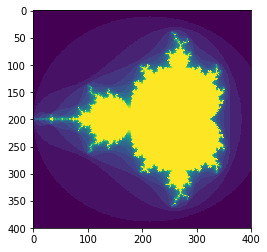

In [8]:
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    
    return divtime

plt.imshow(mandelbrot(400,400))
plt.show()

La figura anterior es un ejemplo del uso de datos por medio de funciones que como resultado, nos proporciona un fractal.

Para unificar el uso de los conceptos anteriores, se deben tener en claro las diferencias entre los conceptos de <strong>variable, lista y arreglo,</strong> además, para completar con la segunda parte de la tarea, se realizará un ejemplo que tiene que ver con el uso de funciones, tipos de datos y análisis de datos, tales como la regresión a un polinomio[2].

Text(0.5,1,'Colección de números aleatorios, con $y$ $\\alpha$ $x^{3}$')

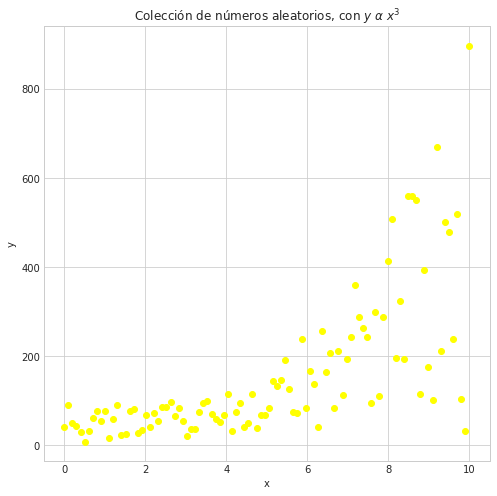

In [58]:
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression #función predefinida en Python.
from sklearn.metrics import r2_score #con este parámetro se observará que tan "bueno" es el ajuste.

n = 100
X = np.linspace(0, 10, 100) #se generarán 100 puntos en x.
y = np.random.rand(n) * X ** 3 + np.random.rand(n) * 100 #polinomio de tercer grado.

plt.figure(figsize=(8,8))
plt.scatter(X, y, color = 'yellow')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title(r'Colección de números aleatorios, con $y$ $\alpha$ $x^{3}$')

0.4625120257618588


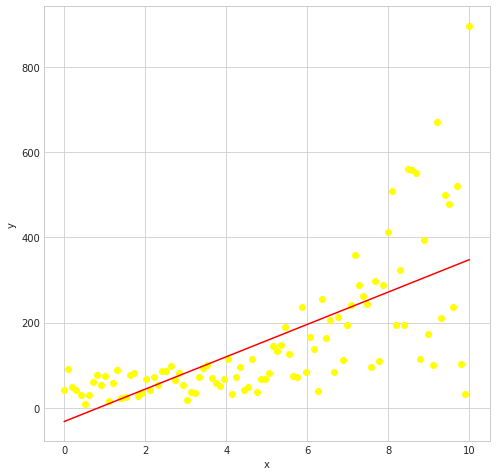

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y) #Tamaño del objeto compatible con los demás objetos.
model_pred = lin_reg.predict(X.reshape(-1,1))

plt.figure(figsize=(8,8));
plt.scatter(X, y, color = 'yellow');
plt.plot(X, model_pred, color = 'red');
plt.xlabel(r'x')
plt.ylabel(r'y')
print(r2_score(y, model_pred))

#Observe que la aproximación no es buena dado que se tiene un valor de r2_score != 1.

0.5316268777155104


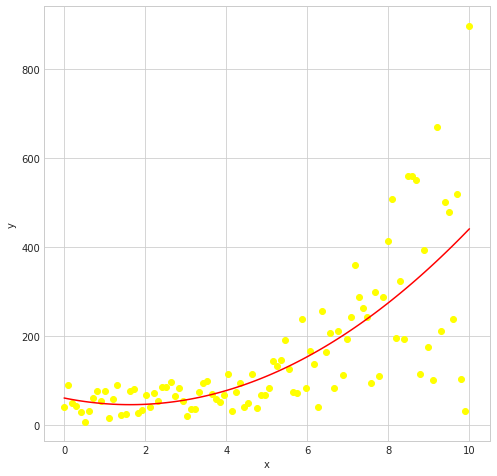

In [60]:
from sklearn.preprocessing import PolynomialFeatures #necesitamos importar una librería en la que se incluyan además, polinomios.

poly_reg = PolynomialFeatures(degree=2) #se establece grado de polinomio.
X_poly = poly_reg.fit_transform(X.reshape(-1, 1)) 


lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)
plt.figure(figsize=(8,8));
plt.scatter(X, y, color = 'yellow');
plt.plot(X, y_pred, color = 'red');
plt.xlabel(r'x')
plt.ylabel(r'y')
print(r2_score(y, y_pred))

#Observe que ahora r2_score se acerca más a 1.

0.5320255996254817


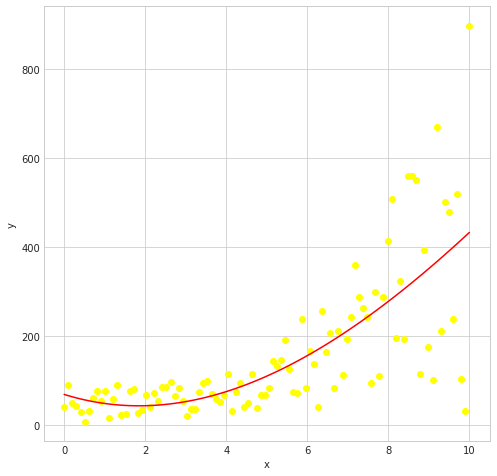

In [61]:
poly_reg_2 = PolynomialFeatures(degree=3) #ahora aumentaremos el grado del polinomio.
X_poly_2 = poly_reg_2.fit_transform(X.reshape(-1, 1))

lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_2, y.reshape(-1, 1))
y_pred = lin_reg_3.predict(X_poly_2)
plt.figure(figsize=(8,8));
plt.scatter(X, y, color = 'yellow');
plt.plot(X, y_pred, color = 'red');
plt.xlabel(r'x')
plt.ylabel(r'y')
print(r2_score(y, y_pred))

#El valor de r2_score sigue tendiendo más a 1 pero se observa cierto estancamiento dado que se tienen
#coeficientes de x muy grandes en la expresión que determina los valores del arreglo de y.

### <strong>Referencias</strong>

<br>[1] The SciPy community. Quickstart tutorial. The Basics. 
<br>[2] Pragyan Subedi. Performing Polynomial Regression using Python. Editor of Kharpann.